In [2]:
import pandas as pd
aqi = pd.read_csv("AQI.csv")
aqi=aqi[aqi["TimePeriod"]==2019]
aqi

,TimePeriod,Geography,AQI
0,2019,Bayside - Little Neck,29
1,2019,Bedford Stuyvesant - Crown Heights,28
2,2019,Bensonhurst - Bay Ridge,29
3,2019,Borough Park,28
4,2019,Canarsie - Flatlands,31
5,2019,Central Harlem - Morningside Heights,29
6,2019,Chelsea - Clinton,42
7,2019,Coney Island - Sheepshead Bay,31
8,2019,Crotona -Tremont,30
9,2019,Downtown - Heights - Slope,31


In [3]:
import pandas as pd
vegCover = pd.read_csv("Factors_VegetativeCover.csv")
vegCover = vegCover.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
vegCover

,Geography,Percent
0,Kingsbridge - Riverdale,63.0
1,Northeast Bronx,36.0
2,Fordham - Bronx Pk,40.0
3,Pelham - Throgs Neck,46.0
4,Crotona -Tremont,32.0
5,High Bridge - Morrisania,21.0
6,Hunts Point - Mott Haven,18.0
7,Greenpoint,14.0
8,Downtown - Heights - Slope,22.0
9,Bedford Stuyvesant - Crown Heights,25.0


In [4]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = 'Lexend-VariableFont_wght.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

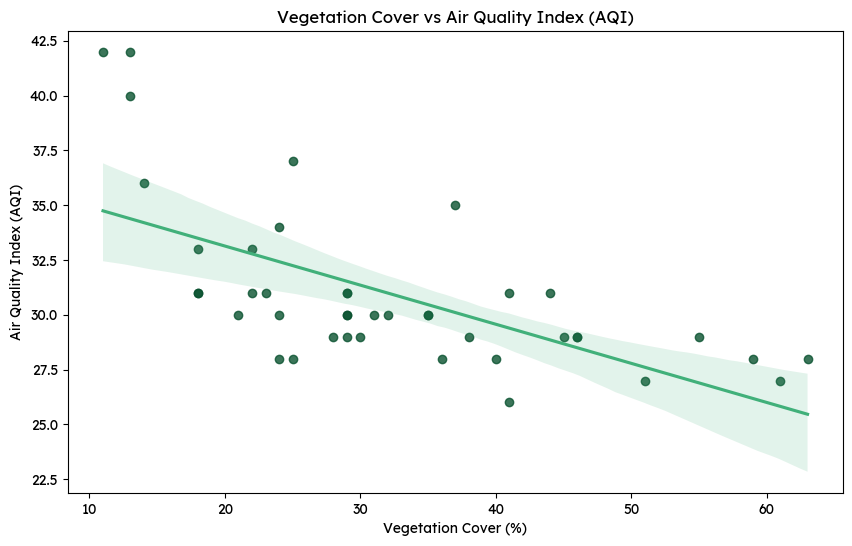

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Rename columns for consistency
vegCover = vegCover.rename(columns={'Percent': 'Vegetation Cover'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(vegCover, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Vegetation Cover'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline in specified colors
ax = sns.regplot(
    data=merged_df, 
    x='Vegetation Cover', 
    y='Air Quality Index', 
    scatter_kws={"color": "#0a5230ff"},  # Point color
    line_kws={"color": "#41b07a"}      # Trendline color
)

# Labels and title
plt.xlabel("Vegetation Cover (%)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Vegetation Cover vs Air Quality Index (AQI)")

# Show the plot
plt.show()


In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load NYC shapefile (assuming it's correctly formatted)
nyc_map = gpd.read_file("UHF42.geo.json")

print(nyc_map.columns)  # Should contain "GEONAME"
print(vegCover.columns)  # Should contain "Geography" and "Percent"




Index(['id', 'GEOCODE', 'GEONAME', 'BOROUGH', 'geometry'], dtype='object')
Index(['Geography', 'Vegetation Cover'], dtype='object')


In [7]:
# Merge vegetation data with NYC map using the correct column
nyc_map = nyc_map.merge(vegCover, left_on="GEONAME", right_on="Geography", how="left")
nyc_map.at[2,"Vegetation Cover"] = 40
nyc_map.at[4,"Vegetation Cover"] = 32
nyc_map.at[8,"Vegetation Cover"] = 22
nyc_map.at[18,"Vegetation Cover"] = 35
nyc_map.at[24,"Vegetation Cover"] = 13
nyc_map.at[25,"Vegetation Cover"] = 13
nyc_map.at[37,"Vegetation Cover"] = 37
nyc_map.at[38,"Vegetation Cover"] = 41

nyc_map

,id,GEOCODE,GEONAME,BOROUGH,geometry,Geography,Vegetation Cover
0,101,101,Kingsbridge - Riverdale,Bronx,"POLYGON ((-73.87793 40.90556, -73.90217 40.912...",Kingsbridge - Riverdale,63.0
1,102,102,Northeast Bronx,Bronx,"POLYGON ((-73.81504 40.889, -73.82285 40.89121...",Northeast Bronx,36.0
2,103,103,Fordham - Bronx Park,Bronx,"POLYGON ((-73.85627 40.88315, -73.85588 40.883...",NaN,40.0
3,104,104,Pelham - Throgs Neck,Bronx,"MULTIPOLYGON (((-73.88366 40.82153, -73.88055 ...",Pelham - Throgs Neck,46.0
4,105,105,Crotona - Tremont,Bronx,"POLYGON ((-73.91444 40.85978, -73.91292 40.861...",NaN,32.0
5,106,106,High Bridge - Morrisania,Bronx,"POLYGON ((-73.91438 40.84646, -73.91527 40.846...",High Bridge - Morrisania,21.0
6,107,107,Hunts Point - Mott Haven,Bronx,"POLYGON ((-73.89216 40.83365, -73.89301 40.835...",Hunts Point - Mott Haven,18.0
7,201,201,Greenpoint,Brooklyn,"POLYGON ((-73.92404 40.71401, -73.92304 40.716...",Greenpoint,14.0
8,202,202,Downtown - Heights - Slope,Brooklyn,"POLYGON ((-73.96913 40.70703, -73.96932 40.704...",NaN,22.0
9,203,203,Bedford Stuyvesant - Crown Heights,Brooklyn,"POLYGON ((-73.91605 40.68607, -73.91785 40.686...",Bedford Stuyvesant - Crown Heights,25.0


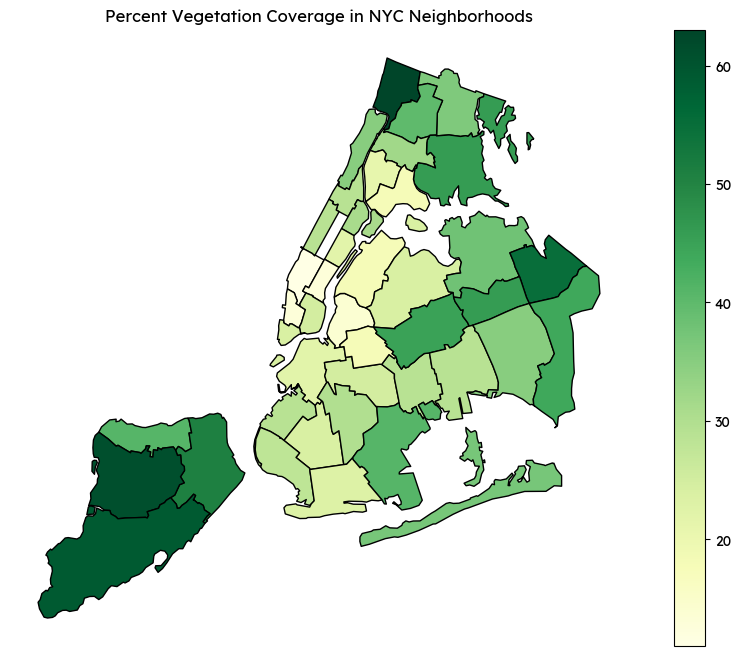

In [8]:

# Plot the map with a color gradient based on vegetation percentage
fig, ax = plt.subplots(figsize=(12, 8))
nyc_map.plot(column="Vegetation Cover", cmap="YlGn", legend=True, edgecolor="black", ax=ax)

# Title and labels
plt.title("Percent Vegetation Coverage in NYC Neighborhoods")
plt.axis("off")  # Hide axis

# Show the map
plt.show()

In [9]:
# Load NYC shapefile (assuming it's correctly formatted)
nyc_map = gpd.read_file("UHF42.geo.json")

nyc_map = nyc_map.merge(aqi, left_on="GEONAME", right_on="Geography", how="left")
nyc_map =  nyc_map.sort_values(by='GEONAME')
nyc_map = nyc_map.reset_index(drop=True)
nyc_map.at[9,"Air Quality Index"] = 30
nyc_map.at[10,"Air Quality Index"] = 31
nyc_map.at[15,"Air Quality Index"] = 28
nyc_map.at[17,"Air Quality Index"] = 42
nyc_map.at[19,"Air Quality Index"] = 40
nyc_map.at[28,"Air Quality Index"] = 26
nyc_map.at[30,"Air Quality Index"] = 35
nyc_map.at[39,"Air Quality Index"] = 30
nyc_map


,id,GEOCODE,GEONAME,BOROUGH,geometry,TimePeriod,Geography,Air Quality Index
0,0,0,,N/A,"MULTIPOLYGON (((-73.82411 40.66358, -73.82712 ...",NaN,NaN,NaN
1,404,404,Bayside - Little Neck,Queens,"POLYGON ((-73.71321 40.75964, -73.72871 40.769...",2019.0,Bayside - Little Neck,29.0
2,203,203,Bedford Stuyvesant - Crown Heights,Brooklyn,"POLYGON ((-73.91605 40.68607, -73.91785 40.686...",2019.0,Bedford Stuyvesant - Crown Heights,28.0
3,209,209,Bensonhurst - Bay Ridge,Brooklyn,"POLYGON ((-74.01695 40.63056, -74.01696 40.631...",2019.0,Bensonhurst - Bay Ridge,29.0
4,206,206,Borough Park,Brooklyn,"POLYGON ((-73.9536 40.61095, -73.9584 40.63633...",2019.0,Borough Park,28.0
5,208,208,Canarsie - Flatlands,Brooklyn,"MULTIPOLYGON (((-73.8986 40.65583, -73.89904 4...",2019.0,Canarsie - Flatlands,31.0
6,302,302,Central Harlem - Morningside Heights,Manhattan,"POLYGON ((-73.93394 40.80826, -73.9339 40.8186...",2019.0,Central Harlem - Morningside Heights,29.0
7,306,306,Chelsea - Clinton,Manhattan,"POLYGON ((-73.99334 40.77273, -73.99597 40.774...",2019.0,Chelsea - Clinton,42.0
8,210,210,Coney Island - Sheepshead Bay,Brooklyn,"POLYGON ((-73.93934 40.61019, -73.94458 40.614...",2019.0,Coney Island - Sheepshead Bay,31.0
9,105,105,Crotona - Tremont,Bronx,"POLYGON ((-73.91444 40.85978, -73.91292 40.861...",NaN,NaN,30.0


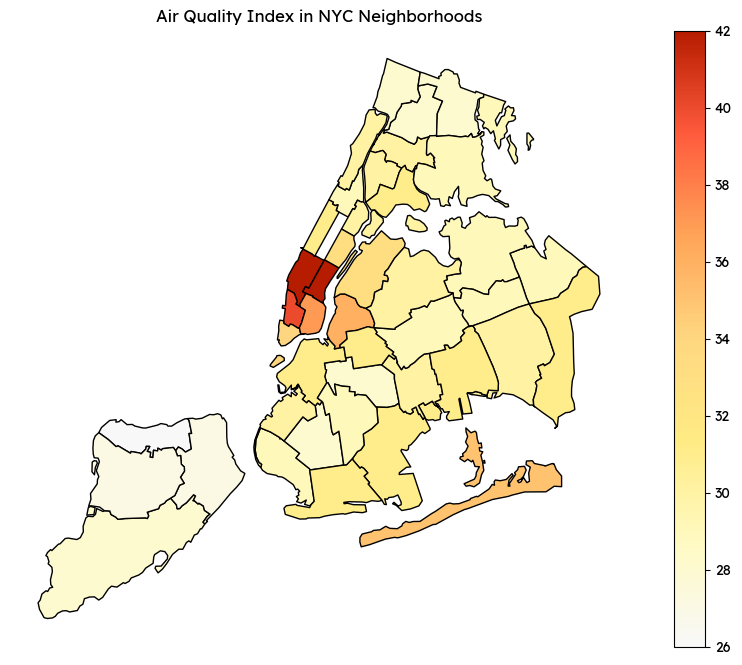

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd

# Define a custom colormap using hex colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_green", ["#f8f8f8ff", "#fffac3ff", "#ffeb84ff", "#ffd780ff", "#ffa458ff", "#ff5b3dff", "#b61c00ff"]  # Light to dark green
)

# Plot the map with a custom colormap
fig, ax = plt.subplots(figsize=(12, 8))
nyc_map.plot(column="Air Quality Index", cmap=custom_cmap, legend=True, edgecolor="black", ax=ax)

# Title and labels
plt.title("Air Quality Index in NYC Neighborhoods")  # Dark green title
plt.axis("off")  # Hide axis

# Show the map
plt.show()

In [11]:
bikeCov = pd.read_csv("Factors_BikeCoverage.csv")
bikeCov = bikeCov.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
bikeCov

,Geography,Percent
0,Kingsbridge - Riverdale,7.0
1,Northeast Bronx,9.0
2,Fordham - Bronx Pk,12.0
3,Pelham - Throgs Neck,8.0
4,Crotona -Tremont,14.0
5,High Bridge - Morrisania,15.0
6,Hunts Point - Mott Haven,18.0
7,Greenpoint,17.0
8,Downtown - Heights - Slope,28.0
9,Bedford Stuyvesant - Crown Heights,19.0


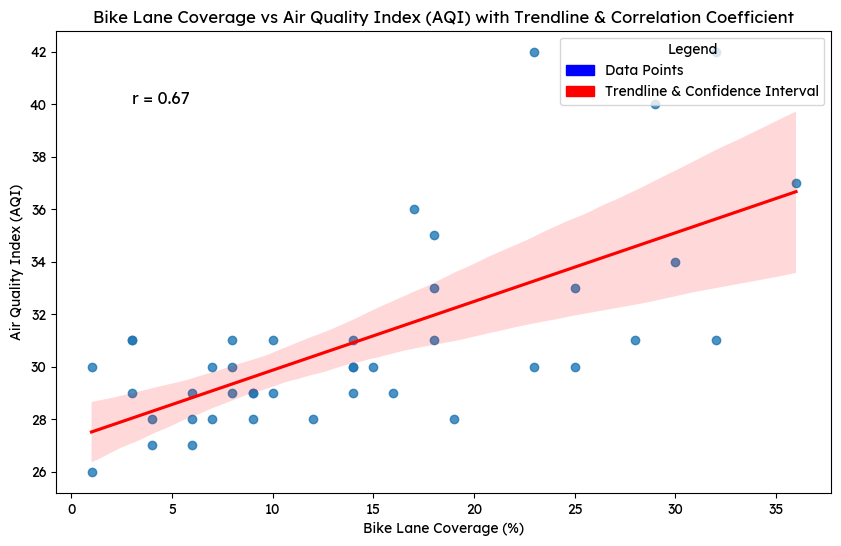

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
bikeCov = bikeCov.rename(columns={'Percent': 'Bike Lane Coverage'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(bikeCov, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Bike Lane Coverage'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Bike Lane Coverage', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Create custom legend entries
scatter_legend = mpatches.Patch(color="blue", label="Data Points")
line_legend = mpatches.Patch(color="red", label="Trendline & Confidence Interval")
corr_legend = f"r = {corr_coef:.2f}"  # Correlation coefficient text

# Add legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc="upper right", fontsize=10, title="Legend")

# Annotate correlation coefficient on the plot
plt.text(merged_df['Bike Lane Coverage'].min() + 2,  # X-coordinate
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Bike Lane Coverage (%)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Bike Lane Coverage vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [13]:
subwayDens = pd.read_csv("Factors_SubwayDensity.csv")
subwayDens = subwayDens.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
subwayDens

,Geography,Density
0,Kingsbridge - Riverdale,0.3
1,Northeast Bronx,0.5
2,Fordham - Bronx Pk,1.1
3,Pelham - Throgs Neck,0.4
4,Crotona -Tremont,0.9
5,High Bridge - Morrisania,1.3
6,Hunts Point - Mott Haven,1.1
7,Greenpoint,1.0
8,Downtown - Heights - Slope,1.7
9,Bedford Stuyvesant - Crown Heights,1.8


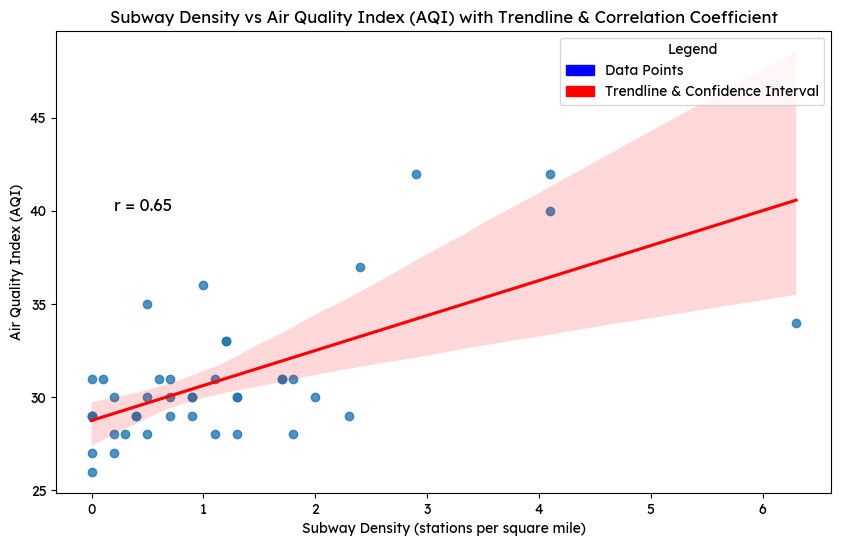

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
subwayDens = subwayDens.rename(columns={'Density': 'Subway Density'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(subwayDens, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Subway Density'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Subway Density', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Create custom legend entries
scatter_legend = mpatches.Patch(color="blue", label="Data Points")
line_legend = mpatches.Patch(color="red", label="Trendline & Confidence Interval")
corr_legend = f"r = {corr_coef:.2f}"  # Correlation coefficient text

# Add legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc="upper right", fontsize=10, title="Legend")

# Annotate correlation coefficient on the plot
plt.text(merged_df['Subway Density'].min() + 0.2,  # Adjusting placement based on density values
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Subway Density (stations per square mile)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Subway Density vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [15]:
sidewalkDens = pd.read_csv("Factors_Sidewalks.csv")
sidewalkDens = sidewalkDens.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
sidewalkDens

,Geography,Percent of land area
0,Kingsbridge - Riverdale,3.5
1,Northeast Bronx,6.9
2,Fordham - Bronx Pk,7.1
3,Pelham - Throgs Neck,4.9
4,Crotona -Tremont,8.6
5,High Bridge - Morrisania,9.7
6,Hunts Point - Mott Haven,6.8
7,Greenpoint,9.3
8,Downtown - Heights - Slope,8.8
9,Bedford Stuyvesant - Crown Heights,10.5


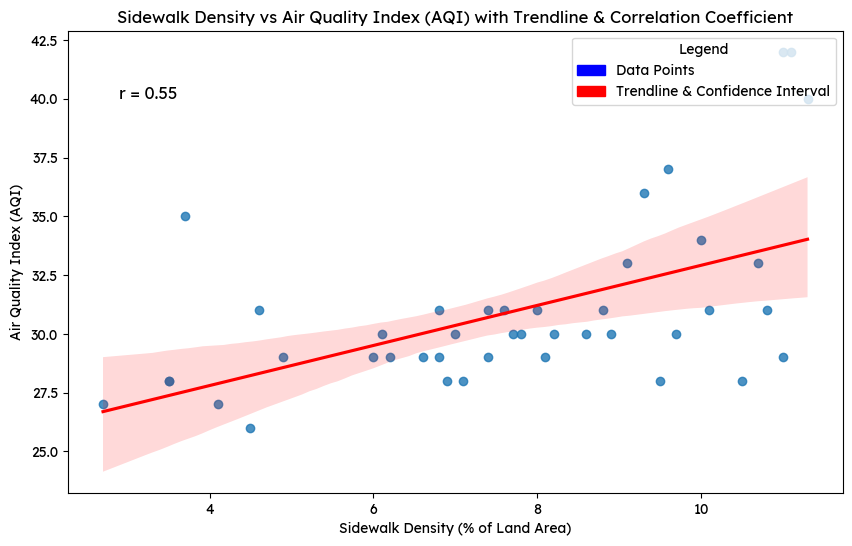

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
sidewalkDens = sidewalkDens.rename(columns={'Percent of land area': 'Sidewalk Density'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(sidewalkDens, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Sidewalk Density'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Sidewalk Density', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Create custom legend entries
scatter_legend = mpatches.Patch(color="blue", label="Data Points")
line_legend = mpatches.Patch(color="red", label="Trendline & Confidence Interval")
corr_legend = f"r = {corr_coef:.2f}"  # Correlation coefficient text

# Add legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc="upper right", fontsize=10, title="Legend")

# Annotate correlation coefficient on the plot
plt.text(merged_df['Sidewalk Density'].min() + 0.2,  # Adjusting placement based on sidewalk density values
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Sidewalk Density (% of Land Area)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Sidewalk Density vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [17]:
walkability = pd.read_csv("Factors_Walkability.csv")
walkability = walkability.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
walkability

,Geography,Score
0,Kingsbridge - Riverdale,-2
1,Northeast Bronx,-1
2,Fordham - Bronx Pk,1
3,Pelham - Throgs Neck,-1
4,Crotona -Tremont,2
5,High Bridge - Morrisania,2
6,Hunts Point - Mott Haven,1
7,Greenpoint,2
8,Downtown - Heights - Slope,3
9,Bedford Stuyvesant - Crown Heights,2


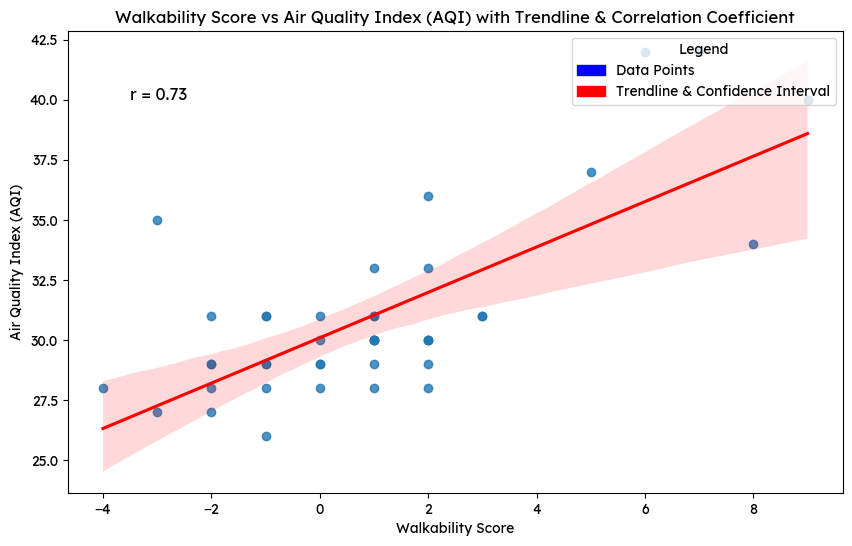

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
walkability = walkability.rename(columns={'Score': 'Walkability Score'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(walkability, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Walkability Score'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Walkability Score', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Create custom legend entries
scatter_legend = mpatches.Patch(color="blue", label="Data Points")
line_legend = mpatches.Patch(color="red", label="Trendline & Confidence Interval")
corr_legend = f"r = {corr_coef:.2f}"  # Correlation coefficient text

# Add legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc="upper right", fontsize=10, title="Legend")

# Annotate correlation coefficient on the plot
plt.text(merged_df['Walkability Score'].min() + 0.5,  # Adjusting placement
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Walkability Score")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Walkability Score vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [20]:
vehicleMiles = pd.read_csv("Factors_Vehicles.csv")
vehicleMiles = vehicleMiles.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
vehicleMiles = vehicleMiles.sort_values(by='Geography')
vehicleMiles.reset_index(drop=True)


,Geography,Million miles per square mile
0,Bayside - Little Neck,80.0
1,Bedford Stuyvesant - Crown Heights,82.6
2,Bensonhurst - Bay Ridge,67.8
3,Borough Park,69.7
4,Canarsie - Flatlands,47.0
5,Central Harlem - Morningside Heights,108.3
6,Chelsea - Clinton,136.0
7,Coney Island - Sheepshead Bay,44.5
8,Crotona -Tremont,102.3
9,Downtown - Heights - Slope,126.8


In [27]:
vehicle_map = gpd.read_file("UHF42.geo.json")


vehicle_map = vehicle_map.merge(vehicleMiles, left_on="GEONAME", right_on="Geography", how="left")
vehicle_map =  vehicle_map.sort_values(by='GEONAME')
vehicle_map = vehicle_map.reset_index(drop=True)


vehicle_map.at[9,"Million miles per square mile"] = 102.3
vehicle_map.at[10,"Million miles per square mile"] = 126.8
vehicle_map.at[15,"Million miles per square mile"] = 60.0
vehicle_map.at[17,"Million miles per square mile"] = 188.2
vehicle_map.at[19,"Million miles per square mile"] = 142.9
vehicle_map.at[28,"Million miles per square mile"] = 17.0
vehicle_map.at[30,"Million miles per square mile"] = 14.0
vehicle_map.at[39,"Million miles per square mile"] = 143.1
vehicle_map

,id,GEOCODE,GEONAME,BOROUGH,geometry,Geography,Million miles per square mile
0,0,0,,N/A,"MULTIPOLYGON (((-73.82411 40.66358, -73.82712 ...",NaN,NaN
1,404,404,Bayside - Little Neck,Queens,"POLYGON ((-73.71321 40.75964, -73.72871 40.769...",Bayside - Little Neck,80.0
2,203,203,Bedford Stuyvesant - Crown Heights,Brooklyn,"POLYGON ((-73.91605 40.68607, -73.91785 40.686...",Bedford Stuyvesant - Crown Heights,82.6
3,209,209,Bensonhurst - Bay Ridge,Brooklyn,"POLYGON ((-74.01695 40.63056, -74.01696 40.631...",Bensonhurst - Bay Ridge,67.8
4,206,206,Borough Park,Brooklyn,"POLYGON ((-73.9536 40.61095, -73.9584 40.63633...",Borough Park,69.7
5,208,208,Canarsie - Flatlands,Brooklyn,"MULTIPOLYGON (((-73.8986 40.65583, -73.89904 4...",Canarsie - Flatlands,47.0
6,302,302,Central Harlem - Morningside Heights,Manhattan,"POLYGON ((-73.93394 40.80826, -73.9339 40.8186...",Central Harlem - Morningside Heights,108.3
7,306,306,Chelsea - Clinton,Manhattan,"POLYGON ((-73.99334 40.77273, -73.99597 40.774...",Chelsea - Clinton,136.0
8,210,210,Coney Island - Sheepshead Bay,Brooklyn,"POLYGON ((-73.93934 40.61019, -73.94458 40.614...",Coney Island - Sheepshead Bay,44.5
9,105,105,Crotona - Tremont,Bronx,"POLYGON ((-73.91444 40.85978, -73.91292 40.861...",NaN,102.3


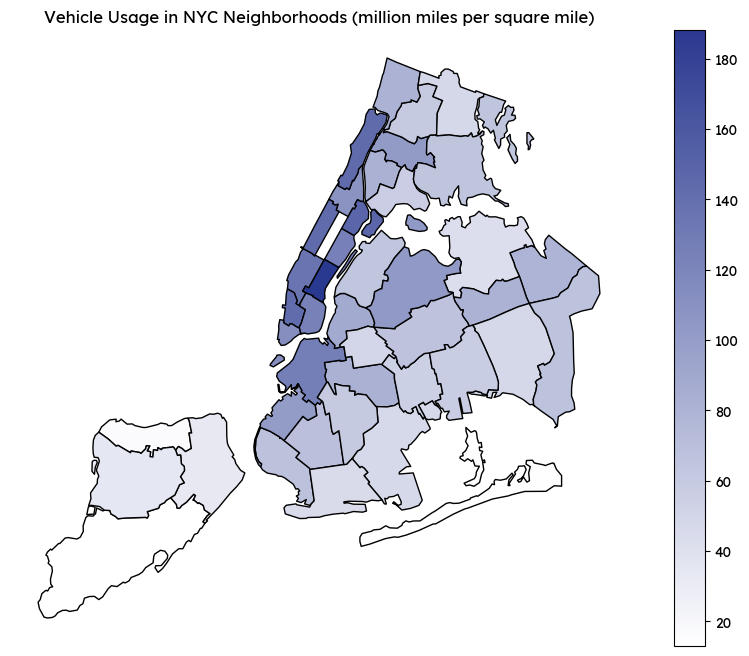

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd

# Define a custom colormap using hex colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_green", ["#ffffffff", "#2a3990ff"]  # Light to dark green
)

# Plot the map with a custom colormap
fig, ax = plt.subplots(figsize=(12, 8))
vehicle_map.plot(column="Million miles per square mile", cmap=custom_cmap, legend=True, edgecolor="black", ax=ax)

# Title and labels
plt.title("Vehicle Usage in NYC Neighborhoods (million miles per square mile)")  # Dark green title
plt.axis("off")  # Hide axis

# Show the map
plt.show()

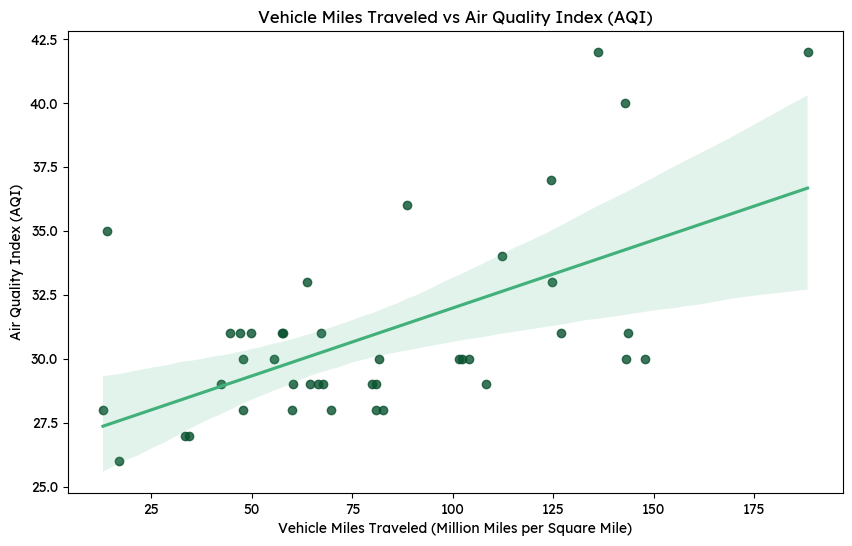

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
vehicleMiles = vehicleMiles.rename(columns={'Million miles per square mile': 'Vehicle Miles Traveled'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(vehicleMiles, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Vehicle Miles Traveled'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(
    data=merged_df, 
    x='Vehicle Miles Traveled', 
    y='Air Quality Index', 
    scatter=True, 
    scatter_kws={"color": "#0a5230ff"},  # Data points color
    line_kws={"color": "#41b07a"}  # Trendline color
)


# Labels and title
plt.xlabel("Vehicle Miles Traveled (Million Miles per Square Mile)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Vehicle Miles Traveled vs Air Quality Index (AQI)")

# Show the plot
plt.show()

In [86]:
recentBike = pd.read_csv("Factors_RecentBiking.csv")
recentBike = recentBike.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod","Number"])

# Example: recentBike DataFrame
recentBike['Percent'] = recentBike['Percent'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)


recentBike

,Geography,Percent
0,Kingsbridge - Riverdale,0.5
1,Northeast Bronx,NaN
2,Fordham - Bronx Pk,5.8
3,Pelham - Throgs Neck,5.4
4,Greenpoint,16.6
5,Downtown - Heights - Slope,14.2
6,Bedford Stuyvesant - Crown Heights,10.6
7,East New York,5.7
8,Sunset Park,7.2
9,Borough Park,6.6


In [87]:
# Mapping UHF34 regions to UHF42 regions
uhf34_to_uhf42 = {
    "Upper East Side-Gramercy": ["Upper East Side", "Gramercy Park - Murray Hill"],
    "Chelsea-Village": ["Chelsea - Clinton", "Greenwich Village - SoHo"],
    "Union Square-Lower Manhattan": ["Union Square - Lower East Side", "Lower Manhattan"],
    "Bayside Little Neck-Fresh Meadows": ["Bayside - Little Neck", "Fresh Meadows"],
    "Northern SI": ["Port Richmond", "Stapleton - St. George"],
    "South Bronx": ["Crotona - Tremont", "High Bridge - Morrisania", "Hunts Point - Mott Haven"],
    "Southern SI": ["Willowbrook", "South Beach - Tottenville"]  # Missing mapping added
}

# Generate UHF42 DataFrame
uhf42_data = []
for uhf34, percent in zip(recentBike["Geography"], recentBike["Percent"]):
    if uhf34 in uhf34_to_uhf42:
        for uhf42 in uhf34_to_uhf42[uhf34]:
            uhf42_data.append({"UHF42": uhf42, "Percent": percent})
    else:
        uhf42_data.append({"UHF42": uhf34, "Percent": percent})

uhf42_df = pd.DataFrame(uhf42_data)

# Ensure we have exactly 42 unique UHF42 regions
assert len(uhf42_df) == 42, f"Expected 42 rows, but got {len(uhf42_df)}"

uhf42_df

,UHF42,Percent
0,Kingsbridge - Riverdale,0.5
1,Northeast Bronx,NaN
2,Fordham - Bronx Pk,5.8
3,Pelham - Throgs Neck,5.4
4,Greenpoint,16.6
5,Downtown - Heights - Slope,14.2
6,Bedford Stuyvesant - Crown Heights,10.6
7,East New York,5.7
8,Sunset Park,7.2
9,Borough Park,6.6


In [88]:
# Correcting the merge operation by specifying both left_on and right_on
merged_df = aqi.merge(uhf42_df, left_on="Geography", right_on="UHF42")
merged_df

,TimePeriod,Geography,Air Quality Index,UHF42,Percent
0,2019,Bayside - Little Neck,29,Bayside - Little Neck,NaN
1,2019,Bedford Stuyvesant - Crown Heights,28,Bedford Stuyvesant - Crown Heights,10.6
2,2019,Bensonhurst - Bay Ridge,29,Bensonhurst - Bay Ridge,8.1
3,2019,Borough Park,28,Borough Park,6.6
4,2019,Canarsie - Flatlands,31,Canarsie - Flatlands,4.1
5,2019,Central Harlem - Morningside Heights,29,Central Harlem - Morningside Heights,5.4
6,2019,Chelsea - Clinton,42,Chelsea - Clinton,10.5
7,2019,Coney Island - Sheepshead Bay,31,Coney Island - Sheepshead Bay,1.0
8,2019,Downtown - Heights - Slope,31,Downtown - Heights - Slope,14.2
9,2019,East Flatbush - Flatbush,29,East Flatbush - Flatbush,9.7


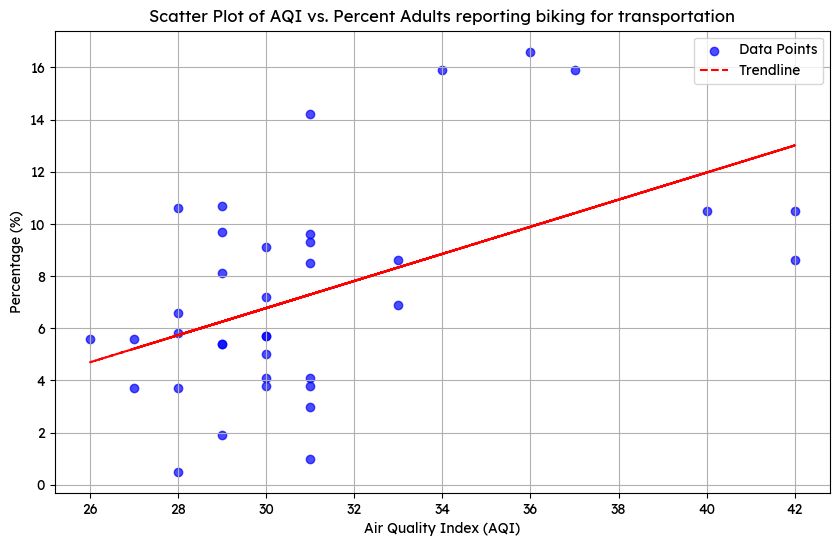

In [89]:
import numpy as np
# Merging the dataframes
merged_df = aqi.merge(uhf42_df, left_on="Geography", right_on="UHF42", how="inner")

# Dropping rows with NaN values
merged_df = merged_df.dropna()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["Air Quality Index"], merged_df["Percent"], alpha=0.7, color='blue', label="Data Points")

# Trendline (linear regression)
x = merged_df["Air Quality Index"]
y = merged_df["Percent"]
m, b = np.polyfit(x, y, 1)  # Fit a linear trendline
plt.plot(x, m*x + b, color='red', linestyle="--", label="Trendline")

plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Percentage (%)")
plt.title("Scatter Plot of AQI vs. Percent Adults reporting biking for transportation")
plt.legend()
plt.grid(True)
plt.show()

In [90]:
cigarettes = pd.read_csv("Factors_CigaretteSmoke.csv")
cigarettes = cigarettes.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "Number"])
cigarettes['Percent'] = cigarettes['Percent'].str.extract(r'([0-9.]+)')

# Convert the 'Percent' column to float
cigarettes['Percent'] = cigarettes['Percent'].astype(float)

cigarettes = cigarettes[cigarettes["TimePeriod"]==2019]
cigarettes.reset_index(drop=True)

,TimePeriod,Geography,Percent
0,2019,Kingsbridge - Riverdale,8.9
1,2019,Northeast Bronx,8.7
2,2019,Fordham - Bronx Pk,16.0
3,2019,Pelham - Throgs Neck,18.2
4,2019,Greenpoint,10.6
5,2019,Downtown - Heights - Slope,8.5
6,2019,Bedford Stuyvesant - Crown Heights,15.1
7,2019,East New York,9.8
8,2019,Sunset Park,20.0
9,2019,Borough Park,5.5


In [91]:
uhf_map = {
    "Upper East Side-Gramercy": ["Upper East Side", "Gramercy Park - Murray Hill"],
    "Chelsea-Village": ["Chelsea - Clinton", "Greenwich Village - SoHo"],
    "Union Square-Lower Manhattan": ["Union Square - Lower East Side", "Lower Manhattan"],
    "Bayside Little Neck-Fresh Meadows": ["Bayside - Little Neck", "Fresh Meadows"],
    "Northern SI": ["Port Richmond", "Stapleton - St. George"],
    "South Bronx": ["Crotona - Tremont", "High Bridge - Morrisania", "Hunts Point - Mott Haven"],
    "Southern SI": ["Willowbrook", "South Beach - Tottenville"]  # Missing mapping added
}


## Generate UHF42 DataFrame
uhf42_data = []
for uhf34, percent in zip(cigarettes["Geography"], cigarettes["Percent"]):
    if uhf34 in uhf_map:
        for uhf42 in uhf_map[uhf34]:
            uhf42_data.append({"UHF42": uhf42, "Percent": percent})
    else:
        uhf42_data.append({"UHF42": uhf34, "Percent": percent})

uhf42_df = pd.DataFrame(uhf42_data)

cigarettes = uhf42_df
cigarettes

,UHF42,Percent
0,Kingsbridge - Riverdale,8.9
1,Northeast Bronx,8.7
2,Fordham - Bronx Pk,16.0
3,Pelham - Throgs Neck,18.2
4,Greenpoint,10.6
5,Downtown - Heights - Slope,8.5
6,Bedford Stuyvesant - Crown Heights,15.1
7,East New York,9.8
8,Sunset Park,20.0
9,Borough Park,5.5


In [92]:
cigarettes.rename(columns={'UHF42': 'Geography'}, inplace=True)

# Merge the dataframes on 'Geography'
df_merged = pd.merge(cigarettes, aqi, on="Geography")

df_merged

,Geography,Percent,TimePeriod,Air Quality Index
0,Kingsbridge - Riverdale,8.9,2019,28
1,Northeast Bronx,8.7,2019,28
2,Fordham - Bronx Pk,16.0,2019,28
3,Pelham - Throgs Neck,18.2,2019,29
4,Greenpoint,10.6,2019,36
5,Downtown - Heights - Slope,8.5,2019,31
6,Bedford Stuyvesant - Crown Heights,15.1,2019,28
7,East New York,9.8,2019,30
8,Sunset Park,20.0,2019,30
9,Borough Park,5.5,2019,28


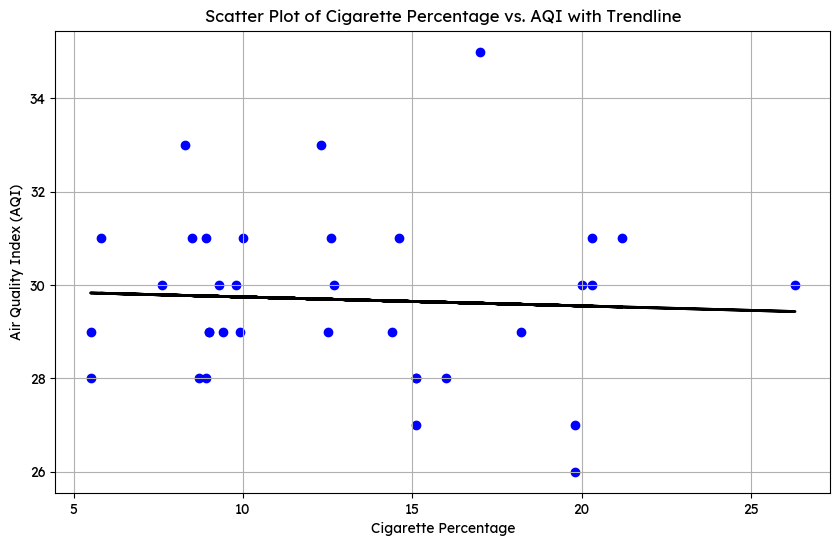

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df_merged_corrected is already merged correctly with 'Geography', 'Percent', and 'AQI'

# Create the plot
plt.figure(figsize=(10, 6))
df_merged = df_merged[df_merged['Air Quality Index'] <= df_merged['Percent'] /5 + 32]

# Scatter plot of the data
plt.scatter(df_merged['Percent'], df_merged['Air Quality Index'], color='blue')

# Fit the linear regression model for the trendline
model = LinearRegression()
model.fit(df_merged['Percent'].values.reshape(-1, 1), df_merged['Air Quality Index'])

# Predict the AQI values based on the 'Percent' values
predictions = model.predict(df_merged['Percent'].values.reshape(-1, 1))

# Plot the trendline
plt.plot(df_merged['Percent'], predictions, color='black', linewidth=2)


# Title and labels
plt.title('Scatter Plot of Cigarette Percentage vs. AQI with Trendline')
plt.xlabel('Cigarette Percentage')
plt.ylabel('Air Quality Index (AQI)')

# Show grid and plot
plt.grid(True)
plt.show()

In [90]:
pubTrans = pd.read_csv("Factors_PublicTransp.csv")
pubTrans = pubTrans.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod", "Bicycle (number)", "Car, truck, or van (number)", "Public transportation (number)","Walked (number)", "Walked (percent)","Bicycle (percent)", "Car, truck, or van (percent)", ])

In [91]:
merged_data = pd.merge(pubTrans, aqi, left_on='Geography', right_on='Geography')
merged_data

,Geography,Public transportation (percent),TimePeriod,Air Quality Index
0,Kingsbridge - Riverdale,47.4,2019,28
1,Northeast Bronx,44.5,2019,28
2,Fordham - Bronx Pk,63.1,2019,28
3,Pelham - Throgs Neck,48.3,2019,29
4,Crotona -Tremont,63.5,2019,30
5,High Bridge - Morrisania,65.7,2019,30
6,Hunts Point - Mott Haven,61.3,2019,31
7,Greenpoint,53.0,2019,36
8,Downtown - Heights - Slope,52.8,2019,31
9,Bedford Stuyvesant - Crown Heights,61.6,2019,28


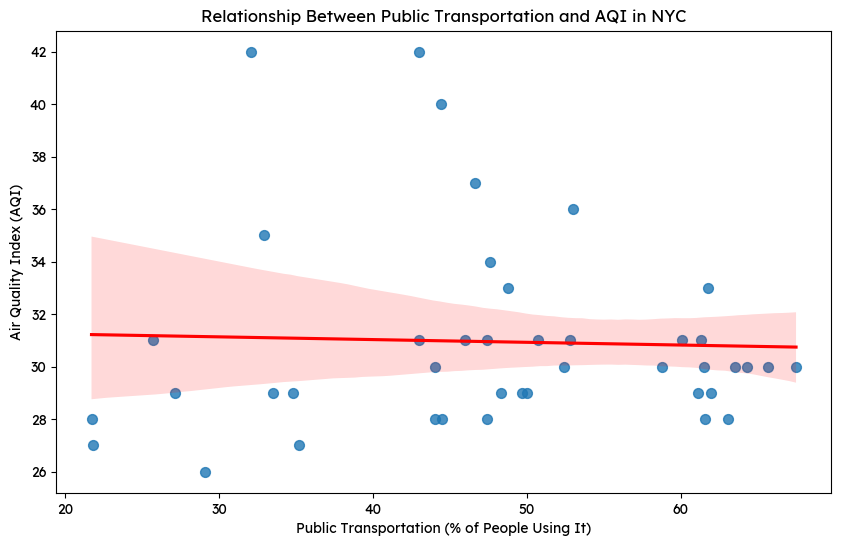

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))

# Create scatterplot with trendline and error region (confidence interval)
sns.regplot(x='Public transportation (percent)', y='Air Quality Index', data=merged_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Public Transportation (% of People Using It)')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Relationship Between Public Transportation and AQI in NYC')

# Show the plot
plt.show()